Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [27]:
df = pd.read_csv('C:/customerchurnprediction/data/Bank Customer Churn Prediction.csv')

Show Top 5 Records

In [28]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Shape of the dataset

In [29]:
df.shape

(10000, 12)

### Dataset Information


This dataset is for ABC Multistate bank with following columns:

* customer_id: Account number.
* credit_scor:, Credit score.
* country: Country of residence.
* gender: Sex(Male or female).
* age: Age.
* tenure: From how many years he/she is having bank acc in ABC Bank.
* balance: Account Balance.
* products_number: Number of Product from bank.
* credit_card: Does this customer have credit card?.
* active_member: Is he/she an active Member of bank?.
* estimated_salary: Salary of the Account holder.
* churn: Churn status. 1 if the client has left the bank during some period or 0 if he/she has not.

Aim is to Predict the Customer Churn for ABC Bank.



### Data Cehcks to Perform

* Check missing values
* Check duplicates
* Check data type
* Check the number of unique values for each column
* Check statistics of the data
* Check the various categories present in the different categorical column

Check missing values

In [30]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are no missing values in the dataset

Check for Duplicates

In [31]:
df.duplicated().sum()

np.int64(0)

Check Data Type

In [32]:
print(df.dtypes)

print(df.info)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object
<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     1

Checking unique values for Each column

In [33]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Check the Statistics of the data

In [34]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Exploring the data

### Churn Distribution

Check for class imbalance

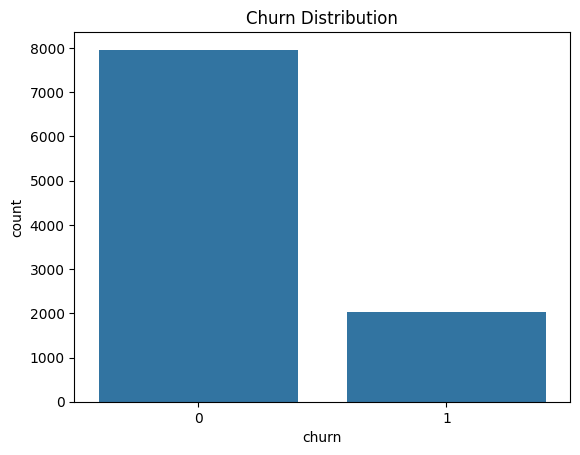

In [35]:
#Count Plot
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

* ABC bank's churn distribution shows majority of the customers are loyal with about 8000 customers never having left the bank relative to 2000 who had left the bank at somepoint. Churners represent a smaller yet significant portion of the customer base. This indicates a case of class imbalance in the target variable.

### Univariate Analysis
Numerical features: age,tenure, balance, credit_score

The objective here is to look for 
* skewed distributions 
* Extreme variables

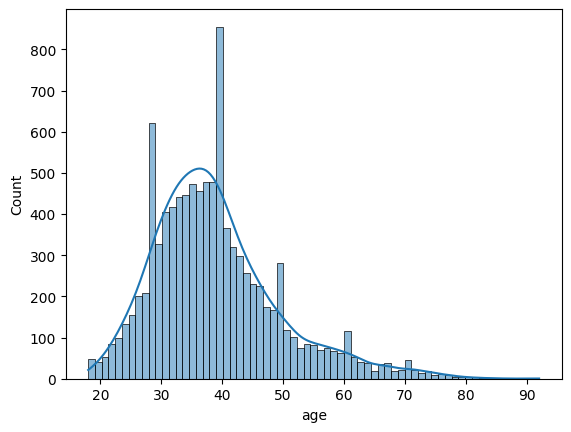

In [36]:
sns.histplot(df['age'], kde=True)
plt.show()

* The customer age is moderately right-skewed, with most customers concentrated between early adulthood and middle age. A small number of customers appear as outliers.

### Age Vs Churn

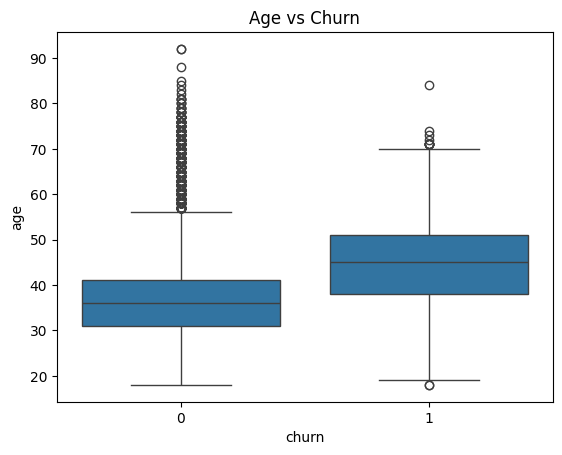

In [37]:
#Are older customers more likely to churn?
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age vs Churn')
plt.show()

Customers who churn tend to be oler on average than those who remain. The median age of churned customers is noticeably higher, and the upper age range shows greater churn variablity.

### Tenure Distribution

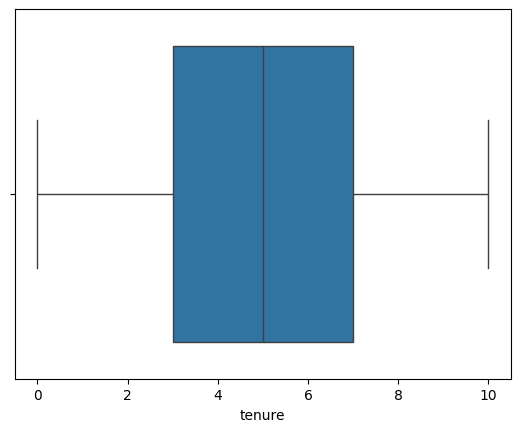

In [38]:
sns.boxplot(x=df['tenure'])
plt.show()

* Tenure is fairly distributed, suggesting customers churn at multiple stages of their relationship with the bank rather than early or late.

### Balance Distribution

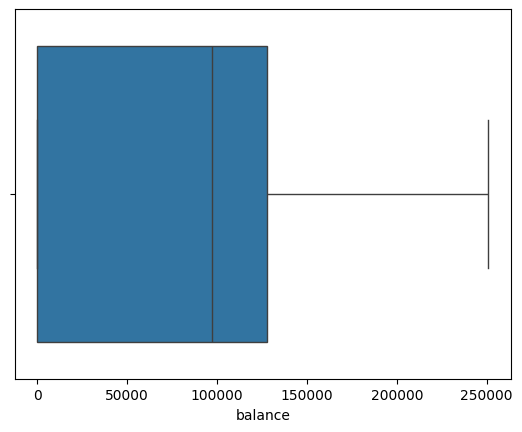

In [39]:
sns.boxplot(x=df['balance'])
plt.show()

* Balances are highly righ-skewed, with many customers holding low or zero balances and a smaller group holding very high balances

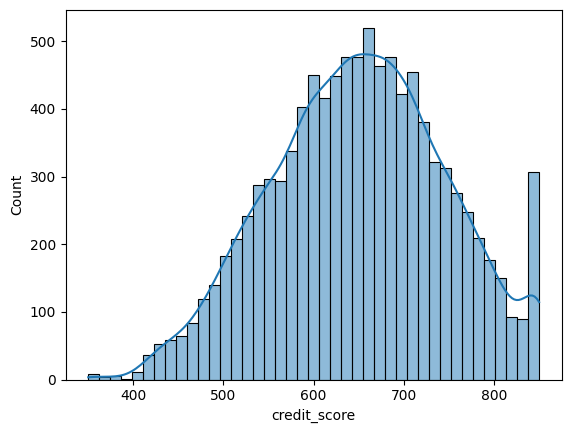

In [40]:


sns.histplot(df['credit_score'], kde=True)
plt.show()





### Binary Features
credit_card, active_member, products_number

The following visuals, show the distribution of above variables.

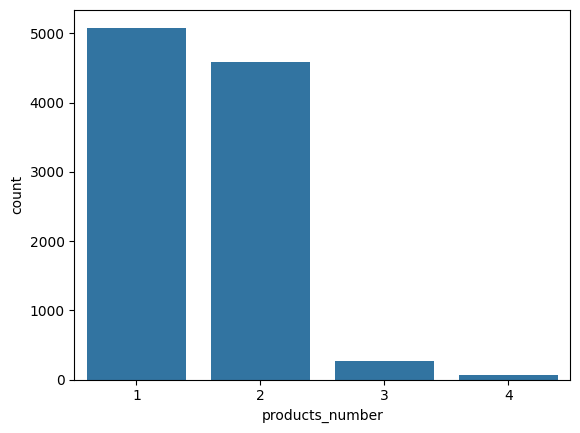

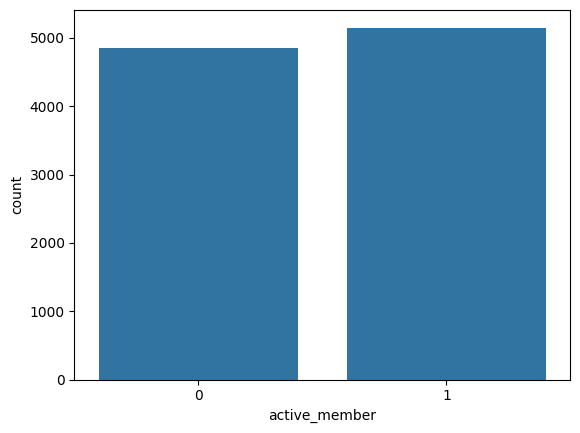

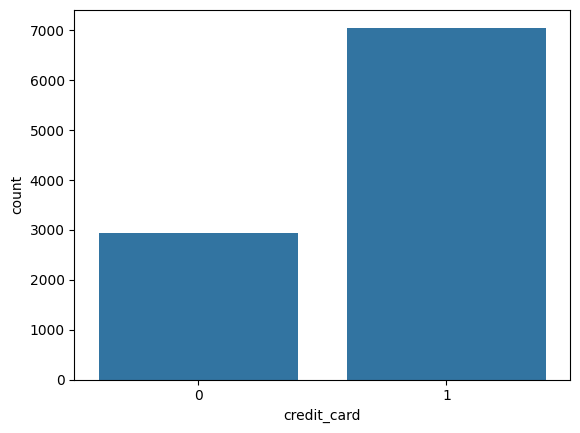

In [48]:
sns.countplot(x='products_number', data=df)
plt.show()

sns.countplot(x='active_member', data=df)
plt.show()

sns.countplot(x='credit_card', data=df)
plt.show()


### Balance vs Churn
Customers with high balances but low engagement often churn

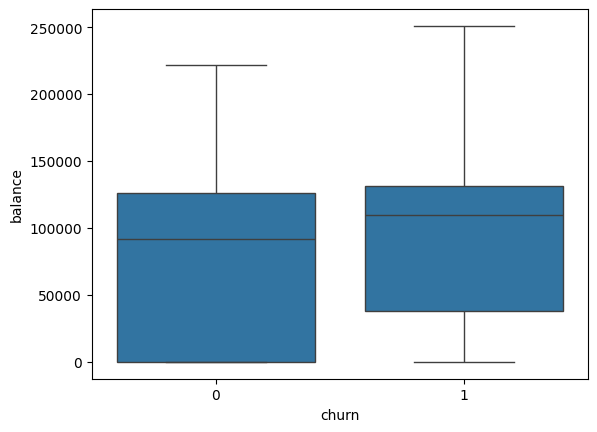

In [42]:
sns.boxplot(x='churn', y='balance', data=df)
plt.show()

* Churned customers tend to have higher average balances compared to non-churned customers.This suggests financially valuable customers are leaving the bank.

### Products Number vs Churn

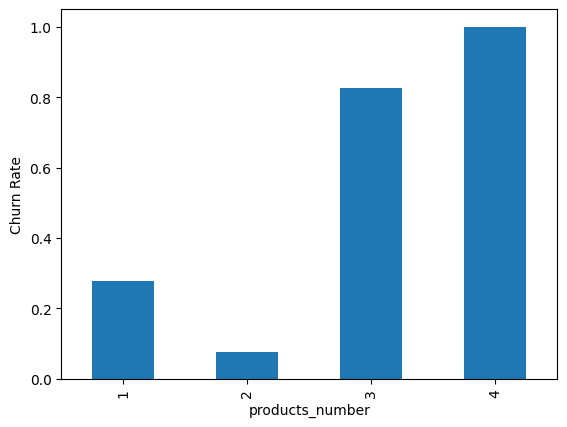

In [43]:
df.groupby('products_number')['churn'].mean().plot(kind='bar')
plt.ylabel('Churn Rate')
plt.show()

In [44]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

* Customers with 2 products have the lowest churn rate(below 10%). Suggesting that having a second product significantly increases the customer "stickiness" or satisfaction compared to those with one.
_____________________________
|products_number |     count |
_____________________________
* | 1             |      5084 |
* | 2             |      4590 |
* | 3             |       266 |
* | 4             |       60  |
_____________________________

* Customers with 3 & 4 products are at risk. These represent a total of 326 customers with a churn rate of between 80-100%. There seems to be a systemic issue since healthy business models, more products means higher retention. It's the opposite in this case.

### Active member vs Churn
Inactive customers churn much more

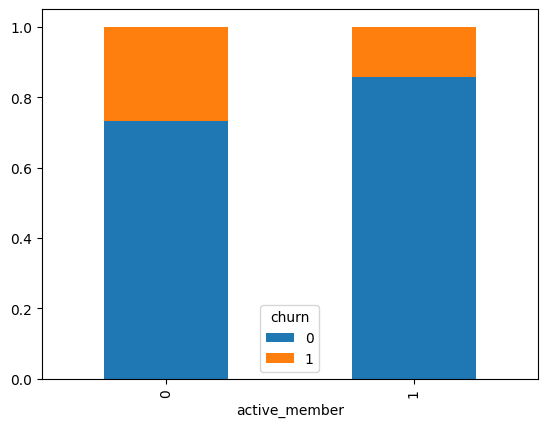

In [45]:
pd.crosstab(df['active_member'],df['churn'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

* Inactive members churn at a substantially higher rate compared to active members. Active engagement strongly correlates with retention.

### Credit card vs Churn

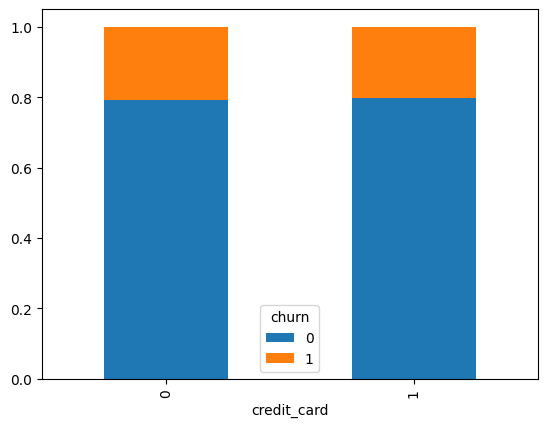

In [46]:
pd.crosstab(df['credit_card'],df['churn'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

* Customers without a credit card show a slightly higher churn rate than those with a credit card, though the difference is less pronounced thanactivity or product count.

### Correlation & Relationships
The objective here is to spot multicollinearity and Important signals such as:
* Strong correlation with churn
* Redundant features

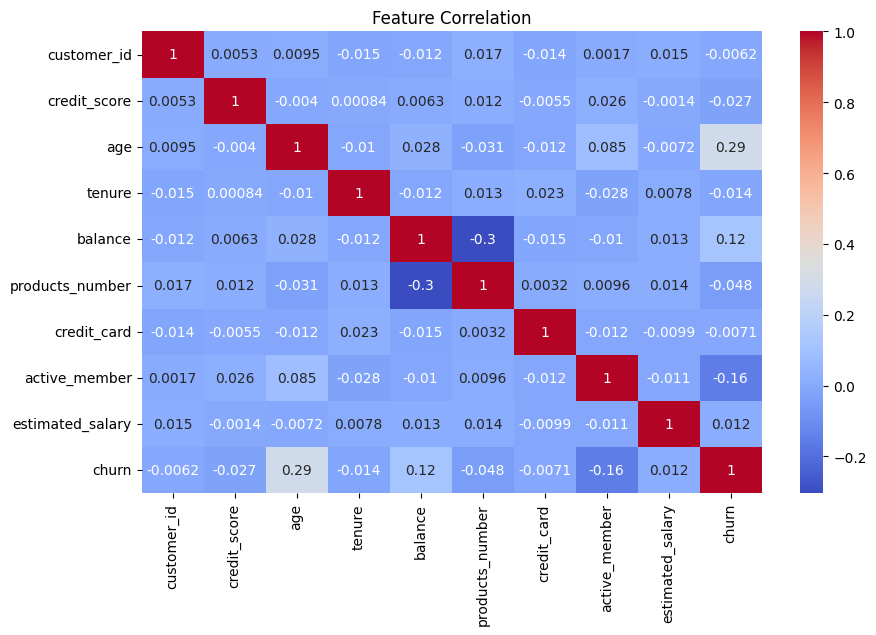

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

The bottom row shows(or last column) shows how each feature relates to the target variable churn.
* Age is the strongest predictor(0.29): There's a moderate positive correlation here. As age increases, the likelihood of churning also tends to increase. This suggest older customers in this dataset are more likely to leave the bank than younger ones.
* Balance(0.12): Slight positive correlation. Higher account balances are associated with a slightly higher risk of churn, which might seem counterintuitive but often occurs if wealthy customers are more sensitive to interest rates or competitor offers.
* Is Active Member (-0.16): This is a negative correlation. It confirms that active members are significantly less likely to churn than inactive ones.
### Strongest Feature Relationships
*Balance vs Products Number(-0.3): The strongest relationship in the entire matrix(outside the diagonal). It shows a negative correlation, meaning customers who have more products with the bank tend to have lower individual account balances, or vice versa.
*Age vs Is Active Member(0.085): A very weak positive link, suggesting older customers might be slightly more active, but it's not a dominant trend.